<div class="alert alert-success">
Hey Amir!
    
    
Such an amazing job! Frankly speaking, I am truly impressed by the progress that you've made. Your best performing model does great job. I would definitely like to take this model and move it to production, since seems to be so good in churn prediction. Business will benefit a lot from having it.
    
    
The report is clear and neat. Each step is very well explained and described. I ended up with no questions at all after reading it.
    
    
My congratulations on the completion of the program! Your skills now are impressive! Pls, text me when you get a job offer, so we can congratulate it together ;)
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! Based on the ROC-AUC score of your best model, you've got 6 SP. Congratulations!


<div class="alert alert-success">
Well done. Thanks for the corrections made. Proceed with the project! I see that you've already done a lot of work. When everything is ready, submit it
</div>

# Project description

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Interconnect's services

Interconnect mainly provides two types of services:
1. Landline communication. The telephone can be connected to several lines simultaneously
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some other services the company provides include:
* Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
* A dedicated technical support line (TechSupport)
* Cloud file storage and data backup (OnlineBackup)
* TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

## Data Description
The data consists of files obtained from different sources:
* `contract.csv` - contract information
* `personal.csv` - the client's personal data
* `internet.csv` - information about Internet services
* `phone.csv` - information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

# Work Plan

1. read all the libraries
2. load the data
3. look at the data: all four data frame have one unique key to them. It is easier to merge all the data frames by the key to use the features of all the four files.
    1. join all the data frames to one using the `customerID` to merge them all
5. analyze the type of the features:
    1. check the categorical features, how many option they have, is it numeric or strings. Are they mixed or the same type.
    1. pay attention to missing values when joining the data sets.
        1. if the missing value are targets, we cannot use it and delete the observation
        1. if the missing value are features, examine if they can be replace with option that relate to lack of this feature like 'No' or 0.
        1. replace the missing features with 'No'
    1. replace type 'object' to 'category' 
    2. replace `BeginDate` from type 'object' type to datetime to be able to make manipulation on this feature.
6. replace the datetime features with useful data that will help the model:
    1. the exact date of joining is less important than the period of the customer is with the company. Because the customers pay monthly, lets transform this data to calculate how many months the customers are customers for the company. 
7. calculate th **target**
    1. we need to know if the customer left or continue with the company. We do so by checking the `EndDate` column, if `EndDate` is not equal to 'No'(left the company), then it is Yes(continues).
8. We now can remove the unnecessary columns: 
    1. `customerID`
    2. `BeginDate`
    3. `EndDate`
10. check for duplicates
12. check for imbalance data. If problem with imbalance data exist, we can address it by `imblearn` library objects.
    1. we can try one of `imblearn` methods for oversampling (SMOTE) OR
    2. try one of `imblearn` combined methods for oversampling and undersampling (SMOTE + Tomek or SMOTE + ENN)
    3. we will have to check if addressing the imbalance problem giving better score.
13. show the features distribution
14. We will decide if we need to normalize the features, depend on the models we will choose. Some of the models doesn't need normalization.
14. we will use encoding for all the categorical features for models that need it. We will use OHE Encoding on the features that are categorical
15. before addressing the imbalance problem, we will divide the data to features and target
16. and divide the data between train and test
17. We will make to sets of train data:
    1. without change
    2. balance data

on the model
1. run baseline model (Decision Tree)
2. try cross validation on some models (random forest, Gradient Boosting, LightGBM and XGBoost)
3. we will calculate the roc_auc_score
4. then we will use the balanced data and run it all again.
5. hopefully the ROC AUC score will be above 90%

In [1]:
#updating libraries
!pip install pandas -U
!pip install seaborn -U
!pip install scikit-learn -U
!pip install catboost -U
!pip install lightgbm -U
!pip install xgboost -U

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay

In [3]:
# definitions
pd.options.display.float_format = '{:,.2f}'.format
state = np.random.RandomState(12345)

In [4]:
# delete error messages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Read and analyze the data

## Loading the data

In [5]:
# read input data
try:
    contract = pd.read_csv('contract.csv', sep=',')
    personal = pd.read_csv('personal.csv', sep=',')
    internet = pd.read_csv('internet.csv', sep=',')
    phone = pd.read_csv('phone.csv', sep=',')
except:
    contract = pd.read_csv("/datasets/final_provider/contract.csv", sep=',')
    personal = pd.read_csv("/datasets/final_provider//personal.csv", sep=',')
    internet = pd.read_csv("/datasets/final_provider/internet.csv", sep=',')
    phone = pd.read_csv("/datasets/final_provider/phone.csv", sep=',')
contract.name='contract data'
personal.name='personal data'
internet.name='internet data'
phone.name='phone data'
df_list=[contract,personal,internet,phone]

## looking at the data

In [6]:
for df in df_list:
    print(df.name)
    display(df.head())
    print()

contract data


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



personal data


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



internet data


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



phone data


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Merging the data

In [7]:
df=pd.merge(left=personal,right=contract,how='outer',on='customerID')
df = pd.merge(left=df,right=internet,how='outer',on='customerID')
df = pd.merge(left=df,right=phone,how='outer',on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [9]:
df.shape

(7043, 20)

conclusion:
1. The dataframe has 7,042 observation (rows)
2.    The dataframe has 20 columns
3.    There are missing values - not every customer has Internet or Landline communication


## missing values

In [10]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

The missing values are from the `internet` and the `phone` data frames.


In [11]:
df['InternetService']=df['InternetService'].fillna('No_internet')

In [12]:
df=df.fillna('No')

## Changing data type

In [13]:
for co in df.columns:
    print(co)
    print(df[co].value_counts())
    print()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

BeginDate
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Type
Month-to-month    3875
Two year          1695
One year          1473
Nam

In [14]:
df['gender']=df['gender'].astype('category')
df['Partner']=df['Partner'].astype('category')
df['Dependents']=df['Dependents'].astype('category')
df['Type']=df['Type'].astype('category')
df['PaperlessBilling']=df['PaperlessBilling'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df['OnlineSecurity']=df['OnlineSecurity'].astype('category')
df['OnlineBackup']=df['OnlineBackup'].astype('category')
df['DeviceProtection']=df['DeviceProtection'].astype('category')
df['TechSupport']=df['TechSupport'].astype('category')
df['StreamingTV']=df['StreamingTV'].astype('category')
df['StreamingMovies']=df['StreamingMovies'].astype('category')
df['MultipleLines']=df['MultipleLines'].astype('category')

In [15]:
df['TotalCharges']=df['TotalCharges'].replace(to_replace=' ',value=0)
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [16]:
df['BeginDate']=pd.to_datetime(df['BeginDate'])

In [17]:
df['EndDate']=df['EndDate'].replace(to_replace='No',value=0)
df['EndDate']=pd.to_datetime(df['EndDate'])
df['ED']=df['EndDate'].copy()
df['EndDate']=df['EndDate'].replace(to_replace={'1970-01-01':0,'2019-10-01':1,'2019-11-01':1,'2019-12-01':1,'2020-01-01':1})
df['stopped']=df['EndDate'].copy()
df['EndDate']=df['ED']
df=df.drop('ED',axis=1)

In [18]:
df['period']= (pd.to_datetime('2020-02-01')- df['BeginDate']).dt.days//30
df['period'].head()

0     1
1    34
2     4
3    45
4     5
Name: period, dtype: int64

The data if for 2020 February 1st. The period column is the number of days a customer is with the company. We don't need the BeginDate and the EndDate, so we will delete them.

In [19]:
df=df.drop(['BeginDate','EndDate','customerID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   Type              7043 non-null   category
 5   PaperlessBilling  7043 non-null   category
 6   PaymentMethod     7043 non-null   category
 7   MonthlyCharges    7043 non-null   float64 
 8   TotalCharges      7043 non-null   float64 
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  MultipleLines     7043 n

<div class="alert alert-success">
<b>Reviewer's comment</b>

The preprocessing looks good, the contract length is calculated correctly, and begindate and enddate are dropped, so there should be no target leakage

</div>

## showing imbalance data

In [20]:
df['stopped'].value_counts()

0    5174
1    1869
Name: stopped, dtype: int64

In [21]:
print(f'The ratio in the target between churn clients to total clients is: {1869/(5174+1869):.2%}')

The ratio in the target between churn clients to total clients is: 26.54%


We will use SMOTE to oversample and balance the target

## features distribution

In [22]:
df_to_show=df.drop(['stopped'], axis=1)
features_list = df_to_show.columns.to_list()
len(features_list)

18

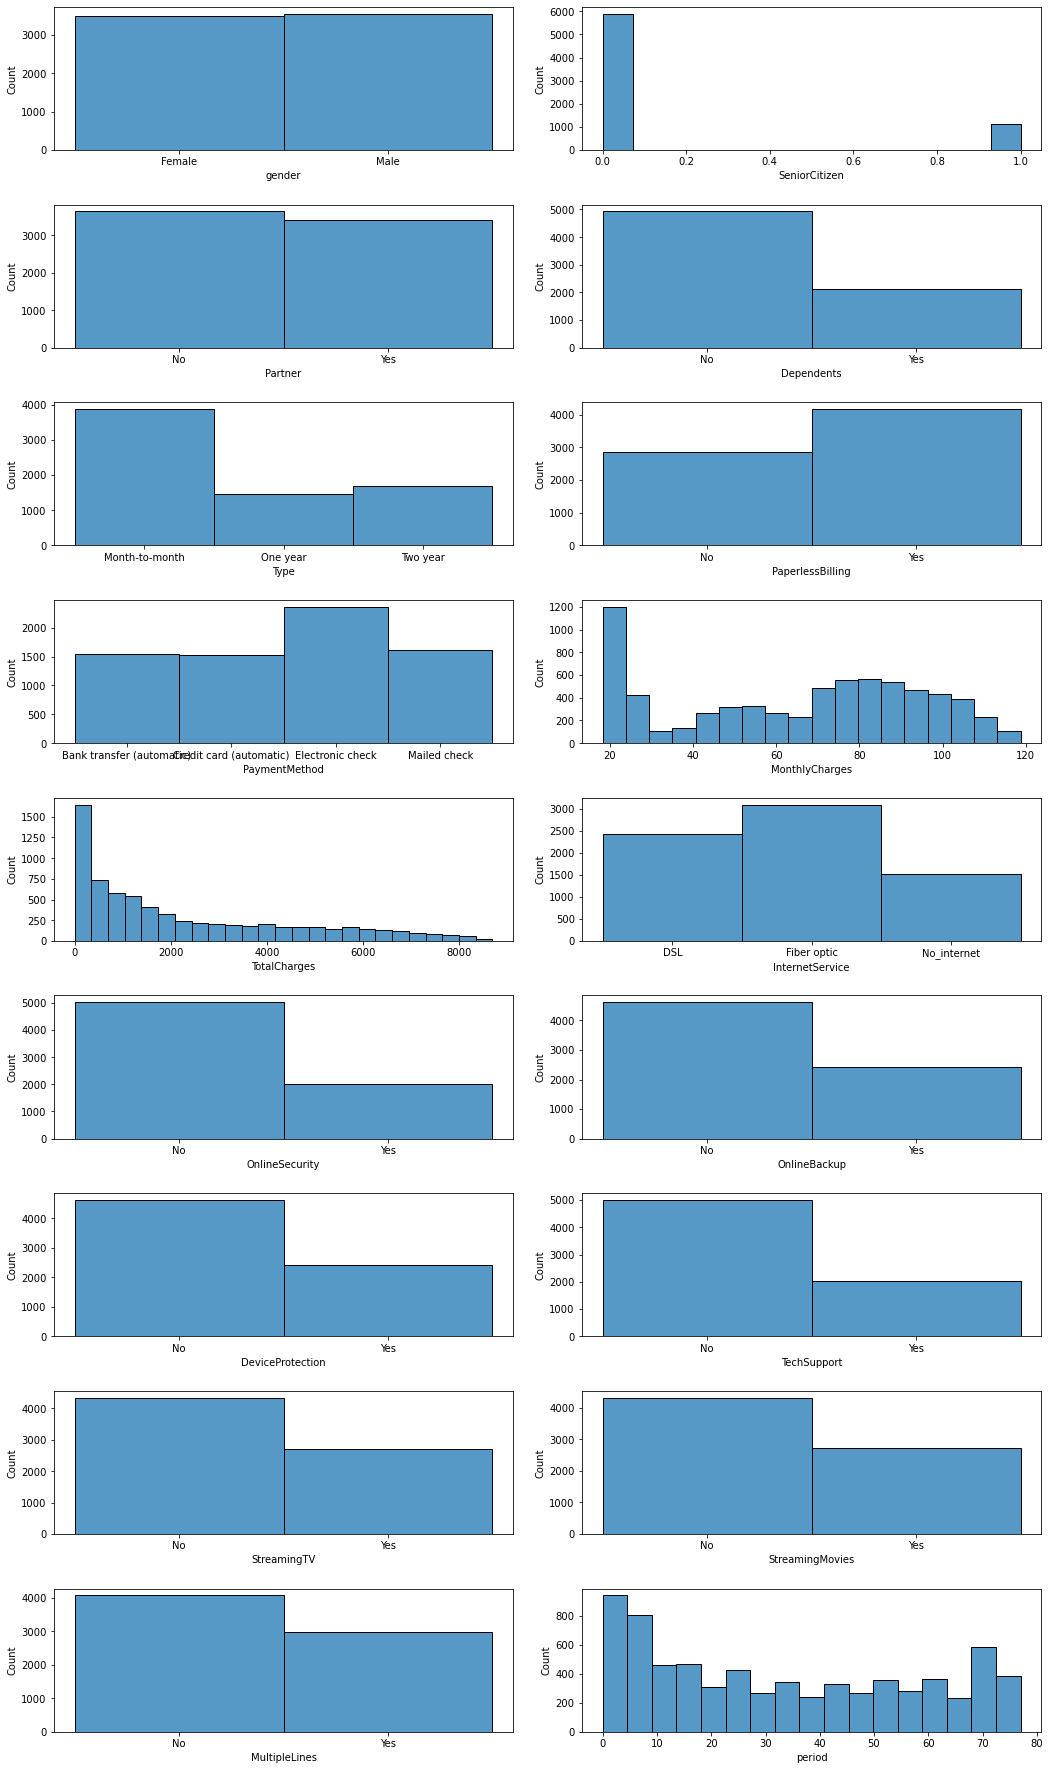

In [23]:
fig=plt.figure(figsize=(15,25))
for i,f in enumerate(features_list):
    plt.subplot(9,2,i+1, label=f)
    sns.histplot(data=df[f])
    fig.tight_layout(pad=2.2)

## Encoding OHE

In [24]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,stopped,period,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,...,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No_internet,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,0,29.85,29.85,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,"1,889.50",0,34,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,0,53.85,108.15,1,4,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,42.30,"1,840.75",0,45,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,0,70.70,151.65,1,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features were encoded

</div>

## splitting train-test and features-target

In [25]:
features=df.drop(['stopped'], axis=1)
target=df['stopped']
features.shape,target.shape

((7043, 22), (7043,))

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data is split into train and test. Target variable fits the task

</div>

# running models

## without balancing

### random forest

In [27]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(75, 400, 5)]

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 100, 5)]
# Add the default as a possible value
rf_max_depth.append(None)

#The minimum number of samples required to split an internal node
rt_min_samples_split = [int(x) for x in np.linspace(2, 20, 5)]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'min_samples_split': rt_min_samples_split}

In [28]:
%%time
# Create the model to be tuned
rf_base = RandomForestClassifier(random_state=12345)

# Create the grid search
rf_gridCV = GridSearchCV(estimator = rf_base, param_grid = rf_grid, scoring='roc_auc',
                               return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
rf_gridCV.fit(features_train, target_train)

# View the best parameters from the grid search
rf_gridCV.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Wall time: 2min 49s


{'max_depth': 28, 'min_samples_split': 11, 'n_estimators': 400}

In [82]:
rf = RandomForestClassifier(max_depth= 28, n_estimators= 400, min_samples_split=11,random_state=12345)

In [83]:
rf.fit(features_train, target_train)

RandomForestClassifier(max_depth=28, min_samples_split=11, n_estimators=400,
                       random_state=12345)

In [84]:
roc = roc_auc_score(target_test, rf.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.4%}')

ROC AUC: 	= 88.2391%


### Gradient Boosting

In [32]:
# Number of trees in Random Forest
gb_n_estimators = [int(x) for x in np.linspace(75, 400, 10)]

# Learning rate
gb_learning_rate = [0.001,0.05,0.1,0.2]

# Maximum number of levels in tree
gb_max_depth = [int(x) for x in np.linspace(5, 100, 10)]
# Add the default as a possible value
gb_max_depth.append(None)

# Create the grid
gb_grid = {'n_estimators': gb_n_estimators,
           'learning_rate': gb_learning_rate,
                'max_depth': gb_max_depth}


In [33]:
%%time
# Create the model to be tuned
gb_model_base = GradientBoostingClassifier(random_state=12345)

# Create the grid search
gb_gridCV = GridSearchCV(estimator = gb_model_base, param_grid = gb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
gb_gridCV.fit(features_train, target_train)

# View the best parameters from the grid search
gb_gridCV.best_params_

Fitting 5 folds for each of 440 candidates, totalling 2200 fits
Wall time: 46min 26s


{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 327}

In [34]:
gb = GradientBoostingClassifier(max_depth= 5, n_estimators= 327,learning_rate=0.2,random_state=12345)

In [35]:
gb.fit(features_train, target_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=327,
                           random_state=12345)

In [36]:
roc = roc_auc_score(target_test, gb.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.4%}')

ROC AUC: 	= 92.9922%


###  LightGBM

In [37]:
lgb_grid = {'num_leaves': [int(x) for x in np.linspace(1, 500, 10)],
           'min_data_in_leaf': [1,3,5,7,10],
           'learning_rate': [0.001,0.01,0.03,0.05,0.1,0.3,0.55],
           'min_data': [int(x) for x in np.linspace(1, 500, 10)]}

In [38]:
%%time
# Create the model to be tuned
lgb_model_base = lgb.LGBMClassifier()

# Create the grid search
lgb_gridCV = GridSearchCV(estimator = lgb_model_base, param_grid = lgb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
lgb_gridCV.fit(features_train, target_train)

# View the best parameters from the grid search
lgb_gridCV.best_params_

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=3, min_data=1 will be ignored. Current value: min_data_in_leaf=3
Wall time: 30min 15s


{'learning_rate': 0.1, 'min_data': 1, 'min_data_in_leaf': 3, 'num_leaves': 56}

In [39]:
lgb_model = lgb.LGBMClassifier(learning_rate= 0.1, min_data= 1, min_data_in_leaf= 3, num_leaves= 56)

In [40]:
lgb_model.fit(features_train, target_train)

LGBMClassifier(min_data=1, min_data_in_leaf=3, num_leaves=56)

In [41]:
roc = roc_auc_score(target_test, lgb_model.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.4%}')

ROC AUC: 	= 92.8840%


### XGBoost

In [42]:
xgb_grid = {"max_depth": [int(x) for x in np.linspace(1, 150, 7)],
              "min_child_weight" : [1,3,6,12],
              "n_estimators": [50,100,200,500,750],
              "learning_rate": [0.001,0.05, 0.1,0.16,0.3]}

In [43]:
%%time
xgb_model_base = xgb.XGBClassifier()

# Create the grid search
xgb_gridCV = GridSearchCV(estimator = xgb_model_base, param_grid = xgb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
xgb_gridCV.fit(features_train, target_train)

# View the best parameters from the grid search
xgb_gridCV.best_params_

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[05:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 48min 11s


{'learning_rate': 0.3,
 'max_depth': 25,
 'min_child_weight': 12,
 'n_estimators': 500}

In [44]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.3, max_depth= 25, min_child_weight= 12, n_estimators= 500)

In [45]:
xgb_model.fit(features_train, target_train)

[05:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=25, min_child_weight=12, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
predicted_test = xgb_model.predict(features_test)

In [47]:
roc = roc_auc_score(target_test, xgb_model.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.4%}')
acc = accuracy_score(target_test, predicted_test)
print(f'Accuracy: \t= {acc:.4%}')

ROC AUC: 	= 93.6809%
Accuracy: 	= 90.8575%


## with balancing 

### balance the train

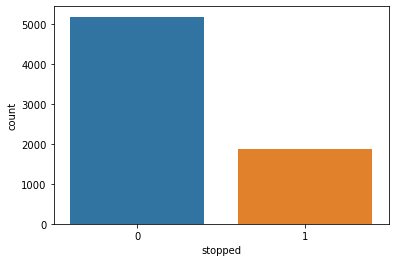

In [48]:
sns.countplot(df['stopped']);

In [49]:
!pip install -U imbalanced-learn

We will use **SMOTE** to oversample and balance the target

In [50]:
from imblearn.combine import SMOTETomek

In [51]:
smt = SMOTETomek(random_state=12345)
features_train_os, target_train_os=smt.fit_resample(features_train, target_train)
train_os=pd.concat([features_train_os,target_train_os],axis=1)

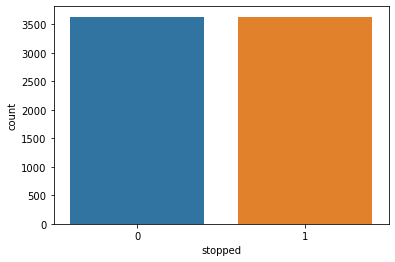

In [52]:
sns.countplot(train_os['stopped']);

### random forest

In [53]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(75, 400, 5)]

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 100, 5)]
# Add the default as a possible value
rf_max_depth.append(None)

#The minimum number of samples required to split an internal node
rt_min_samples_split = [int(x) for x in np.linspace(2, 20, 5)]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'min_samples_split': rt_min_samples_split}

In [54]:
%%time
# Create the model to be tuned
rf_base = RandomForestClassifier(random_state=12345)

# Create the grid search Random Forest
rf_gridCV = GridSearchCV(estimator = rf_base, param_grid = rf_grid, scoring='roc_auc',
                               return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
rf_gridCV.fit(features_train_os, target_train_os)

# View the best parameters from the grid search
rf_gridCV.best_params_


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Wall time: 3min 37s


{'max_depth': 28, 'min_samples_split': 2, 'n_estimators': 400}

In [85]:
rf = RandomForestClassifier(max_depth= 28, n_estimators= 400,min_samples_split=2,random_state=12345)

In [86]:
rf.fit(features_train_os, target_train_os)

RandomForestClassifier(max_depth=28, n_estimators=400, random_state=12345)

In [87]:
predicted_test = rf.predict(features_test)

In [88]:
roc = roc_auc_score(target_test, rf.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.3%}')
acc = accuracy_score(target_test, predicted_test)
print(f'Accuracy: \t= {acc:.3%}')

ROC AUC: 	= 86.546%
Accuracy: 	= 80.806%


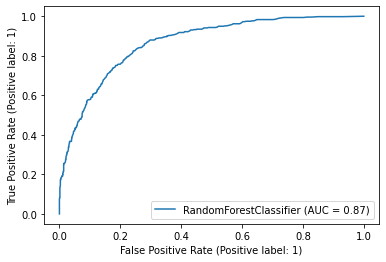

In [89]:
RocCurveDisplay.from_estimator(rf, features_test, target_test);

### Gradient Boosting

In [60]:
# Number of trees in Random Forest
gb_n_estimators = [int(x) for x in np.linspace(100, 450, 5)]

# Learning rate
gb_learning_rate = [0.001,0.2,0.5]

# Maximum number of levels in tree
gb_max_depth = [int(x) for x in np.linspace(1, 25, 5)]
# Add the default as a possible value
gb_max_depth.append(None)

# Create the grid
gb_grid = {'n_estimators': gb_n_estimators,
           'learning_rate': gb_learning_rate,
                'max_depth': gb_max_depth}

In [61]:
%%time
# Create the model to be tuned
gb_model_base = GradientBoostingClassifier(random_state=12345)

# Create the grid search
gb_gridCV = GridSearchCV(estimator = gb_model_base, param_grid = gb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
gb_gridCV.fit(features_train_os, target_train_os)

# View the best parameters from the grid search
gb_gridCV.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Wall time: 8min 56s


{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 450}

In [62]:
gb = GradientBoostingClassifier(max_depth= 7, n_estimators= 450,learning_rate=0.5,random_state=12345)

In [63]:
gb.fit(features_train_os, target_train_os)

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, n_estimators=450,
                           random_state=12345)

In [64]:
predicted_test = gb.predict(features_test)

In [65]:
roc = roc_auc_score(target_test, gb.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.3%}')
acc = accuracy_score(target_test, predicted_test)
print(f'Accuracy: \t= {acc:.3%}')

ROC AUC: 	= 92.593%
Accuracy: 	= 87.791%


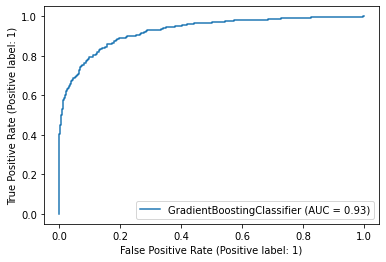

In [66]:
RocCurveDisplay.from_estimator(gb, features_test, target_test);

###  LightGBM

In [67]:
lgb_grid = {'num_leaves': [int(x) for x in np.linspace(1, 500, 10)],
           'min_data_in_leaf': [1,3,5,7,10],
           'learning_rate': [0.001,0.01,0.03,0.05,0.1,0.3,0.55],
           'min_data': [int(x) for x in np.linspace(1, 500, 10)]}

In [68]:
%%time
# Create the model to be tuned
lgb_model_base = lgb.LGBMClassifier()

# Create the grid search
lgb_gridCV = GridSearchCV(estimator = lgb_model_base, param_grid = lgb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
lgb_gridCV.fit(features_train_os, target_train_os)

# View the best parameters from the grid search
lgb_gridCV.best_params_

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_data=1 will be ignored. Current value: min_data_in_leaf=10
Wall time: 2h 35min 15s


{'learning_rate': 0.55,
 'min_data': 1,
 'min_data_in_leaf': 10,
 'num_leaves': 56}

In [69]:
lgb_model = lgb.LGBMClassifier(learning_rate= 0.55, min_data= 1, min_data_in_leaf= 10, num_leaves= 56)

In [70]:
lgb_model.fit(features_train_os, target_train_os)

LGBMClassifier(learning_rate=0.55, min_data=1, min_data_in_leaf=10,
               num_leaves=56)

In [71]:
predicted_test = lgb_model.predict(features_test)

In [72]:
roc = roc_auc_score(target_test, lgb_model.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.3%}')
acc = accuracy_score(target_test, predicted_test)
print(f'Accuracy: \t= {acc:.3%}')

ROC AUC: 	= 92.044%
Accuracy: 	= 87.507%


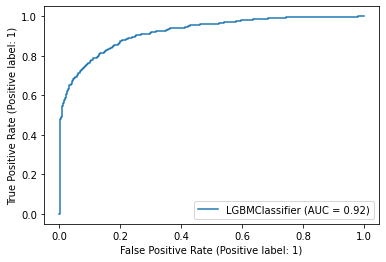

In [73]:
RocCurveDisplay.from_estimator(lgb_model, features_test, target_test);

### XGBoost

In [74]:
xgb_grid = {"max_depth": [int(x) for x in np.linspace(1, 150, 7)],
              "min_child_weight" : [1,3,6,12],
              "n_estimators": [50,100,200,500,750],
              "learning_rate": [0.001,0.05, 0.1,0.16,0.3]}

In [75]:
%%time
# Create the model to be tuned
xgb_model_base = xgb.XGBClassifier()

# Create the grid search
xgb_gridCV = GridSearchCV(estimator = xgb_model_base, param_grid = xgb_grid, scoring='roc_auc',
                        return_train_score=True, cv = 5, verbose = 3, n_jobs = -1)

# Fit the grid search model
xgb_gridCV.fit(features_train_os, target_train_os)

# View the best parameters from the grid search
xgb_gridCV.best_params_

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[09:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 7min 53s


{'learning_rate': 0.3,
 'max_depth': 25,
 'min_child_weight': 12,
 'n_estimators': 750}

In [76]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.3, max_depth= 25, min_child_weight= 12, n_estimators= 750)

In [77]:
xgb_model.fit(features_train_os, target_train_os)

[09:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=25, min_child_weight=12, missing=nan,
              monotone_constraints='()', n_estimators=750, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
predicted_test = xgb_model.predict(features_test)

In [79]:
roc = roc_auc_score(target_test, xgb_model.predict_proba(features_test)[:,1])
print(f'ROC AUC: \t= {roc:.3%}')
acc = accuracy_score(target_test, predicted_test)
print(f'Accuracy: \t= {acc:.3%}')

ROC AUC: 	= 93.266%
Accuracy: 	= 90.460%


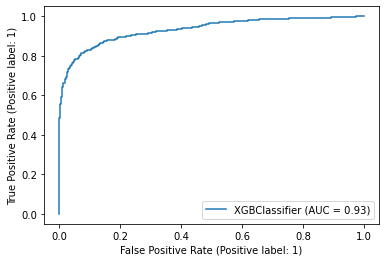

In [80]:
RocCurveDisplay.from_estimator(xgb_model, features_test, target_test);

In [81]:
pd.DataFrame(xgb_gridCV.cv_results_).head()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, you tried a few different models, tuned their hyperparameters using a cross-validated grid search and used a balancing technique to deal with the class imbalance!

</div>

# Solution Report

## What steps of the plan were performed and what steps were skipped (explain why)?

Generally, all the steps of the plan were preformed as planned. When we had to consider one of two options, here is what we did:

### Steps that was made as planned:
1. read all the libraries
2. load the data
3. join all the data frames to one using the `customerID` to merge them all
4. check the categorical features, how many option they have, is it numeric or strings. Are they mixed or the same type.
5. missing values when joining the data sets: replace with option that relate to lack of this feature like 'No'.
6. replace type 'object' to 'category' 
7. replace `BeginDate` from type 'object' type to datetime to be able to make manipulation on this feature.
8. replace the datetime features with useful data that will help the model: calculate how many months the customers are customers for the company
9. calculate th **target**: check the `EndDate` column, if `EndDate` is not equal to 'No'(left the company), then it is Yes(continues).
10. remove the unnecessary columns: `customerID`, `BeginDate`, `EndDate`
10. check for duplicates
12. check for imbalance data. imbalance data exist, we address it by `imblearn` library objects, try `imblearn` combined methods for oversampling and undersampling (SMOTE + Tomek)
13. we checked if addressing the imbalance problem giving better score: ***NO!***
13. show the features distribution
14. we used encoding for all the categorical features for models that need it. We will use OHE Encoding on the features that are categorical
15. divide the data to features and target
16. divide the data between train and test
17. make two sets of train data:
    1. without change
    2. balance data
1. run baseline model (Decision Tree)
2. try cross validation on some models (random forest, Gradient Boosting, LightGBM and XGBoost)
3. we will calculate the roc_auc_score
4. then we will use the balanced data and run it all again.
5. hopefully the ROC AUC score will be above 90%

### Steps that was skipped:
1. We will decide if we need to normalize the features, depend on the models we will choose. Some of the models doesn't need normalization - We **didn't** use normalization because the models we tried doesn't need normalization to operate.

## What difficulties did you encounter and how did you manage to solve them?

When using balanced data, the score didn't get higher. the scores of the models on unbalanced and balanced - the *test* set didn't improve. We had to check three kinds of balancing data: oversampling - SMOTE, over- and under- balancing: SMOTE + Tomek and SMOTE + ENN. We decided to kip the SMOTE + Tomek for marginal extra score.

## What were some of the key steps to solving the task?

The project key steps was: reading the data, EDA, preprocess the data for modeling, try some models, find better hyperparameters than the default and compare balanced result to the unbalanced result.

## What is your final model and what quality score does it have?

The Best model we got, considering ROC - AUC and Accuracy is:
xgb.XGBClassifier(learning_rate= 0.3, max_depth= 25, min_child_weight= 12, n_estimators= 750)

| Model | data | roc auc - score | accuracy - score |
|---|---|---|---|
| XGBoost | unbalance | 93.68 | 90.85 |
| XGBoost | balance | 93.27 | 90.46 |
| LightGBM | unbalance | 92.88 |  |
| LightGBM | balance | 92.04 | 87.51 |
| GradientBoosting | unbalance | 92.99 |  |
| GradientBoosting | balance | 92.59 | 87.79 |
| Random Forest | unbalance | 88.24 |  |
| Random Forest | balance | 86.55 | 80.81 |